First few rows of the dataset:
  Module   Customer  Style  Total SMV  Sewing SMV         SO#    LI  \
0   AL01  Patagonia  40260      33.10       33.10  1000987968  50.0   
1    NaN  Patagonia  40260        NaN         NaN         NaN   NaN   
2   AL01        NaN  40260      33.10       33.10         NaN   NaN   
3    NaN        NaN  40260        NaN         NaN         NaN   NaN   
4   AL02  Patagonia  40255      33.61       33.61  1000975993  20.0   

  Sewing Stage Colour    E  ... 12/24/23 12/25/23 12/26/23 12/27/23 12/28/23  \
0       Stitch   WLWT    1  ...        -        -        -        -        -   
1          NaN    NaN  NaN  ...        -        -        -        -        -   
2          NaN    NaN  NaN  ...      451      451      451      451      451   
3          NaN    NaN  NaN  ...        -        -        -        -        -   
4       Stitch   BUGR    1  ...        -        -        -        -        -   

  12/29/23 12/30/23 12/31/23            SOLI          Ladder 

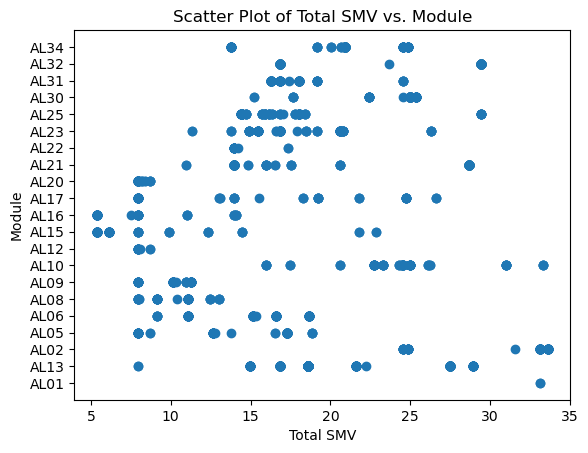

/var/folders/7f/07x_7tyj0ks88k6lc1jtgpqh0000gn/T/ipykernel_61862/827804859.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Defect_Rate'] = data['Defect Qty'] / data['Total SMV']


Model Accuracy: 0.9696969696969697


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Random Forest: Mean Accuracy = 0.7875, Std Deviation = 0.1146


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

Logistic Regression: Mean Accuracy = 0.9295, Std Deviation = 0.0459
SVM: Mean Accuracy = 0.7636, Std Deviation = 0.1121


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree: Mean Accuracy = 0.9981, Std Deviation = 0.0027
The best model is: Decision Tree


DecisionTreeClassifier()

In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Step 2: Load your dataset from a CSV file
data = pd.read_csv('Dataset/production.csv')

# Step 3: Display the first few rows of the dataset to get an overview
print("First few rows of the dataset:")
print(data.head())

# Step 4: Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Step 5: Handle missing values
numeric_columns = data.select_dtypes(include=[np.number])
data[numeric_columns.columns] = data[numeric_columns.columns].fillna(data[numeric_columns.columns].mean())

categorical_columns = data.select_dtypes(exclude=[np.number])
data[categorical_columns.columns] = data[categorical_columns.columns].fillna(data[categorical_columns.columns].mode().iloc[0])

# Step 6: Feature Visualization (example: Total SMV vs. Module)
plt.scatter(data['Total SMV'], data['Module'])
plt.title('Scatter Plot of Total SMV vs. Module')
plt.xlabel('Total SMV')
plt.ylabel('Module')
plt.show()

# Step 7: Feature Engineering (example: Defect_Rate)
data['Defect_Rate'] = data['Defect Qty'] / data['Total SMV']

# Step 8: Data Preprocessing
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[categorical_columns.columns])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[numeric_columns.columns])

preprocessed_data = np.concatenate([encoded_features.toarray(), scaled_features], axis=1)

# Step 9: Model Selection
X = preprocessed_data
y = data['Module']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 10: Model Evaluation (example: accuracy)
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

# Step 11: Model Interpretation and Deployment (as needed)
# Additional steps, including cross-validation, hyperparameter tuning, and more, can be added based on your requirements.




X = preprocessed_data
y = data['Module']

# Step 6: Define a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Step 7: Evaluate each model using cross-validation
results = []
names = []

for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    results.append(scores)
    names.append(name)
    print(f'{name}: Mean Accuracy = {scores.mean():.4f}, Std Deviation = {scores.std():.4f}')

# Step 8: Select the best model based on mean accuracy
best_model_index = np.argmax([scores.mean() for scores in results])
best_model_name = names[best_model_index]
best_model = models[best_model_index][1]

print(f'The best model is: {best_model_name}')

# Step 9: Train the best model on the full dataset
best_model.fit(X, y)
